In [7]:
import scipy.io as sio
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [8]:
train_data = sio.loadmat('/Users/shamsbenmefteh/Documents/Fine_tuning_exp/data/SVHN/train_32x32.mat')
test_data = sio.loadmat('/Users/shamsbenmefteh/Documents/Fine_tuning_exp/data/SVHN/test_32x32.mat')

X: A 4-D matrix containing the images with shape (32, 32, 3, N) where:

First dimension: Height (32 pixels)

Second dimension: Width (32 pixels)

Third dimension: Color channels (3 for RGB)

Fourth dimension: Number of images (N)

y: A vector of class labels with shape (N, 1) where each label represents the digit (0-9, but originally 1-10 with 10 representing 0)

In [9]:
# Extract X and y
X_train = train_data['X']  # Shape: (32, 32, 3, N)
y_train = train_data['y']  # Shape: (N, 1)

print(f"Original X train shape: {X_train.shape}")
print(f"Original y train shape: {y_train.shape}")

Original X train shape: (32, 32, 3, 73257)
Original y train shape: (73257, 1)


In [10]:
# Extract X and y
X_test = test_data['X']  # Shape: (32, 32, 3, N)
y_test = test_data['y']  # Shape: (N, 1)

print(f"Original X test shape: {X_test.shape}")
print(f"Original y test shape: {y_test.shape}")

Original X test shape: (32, 32, 3, 26032)
Original y test shape: (26032, 1)


In [11]:
# Transpose X from (H, W, C, N) to (N, H, W, C)
X_train = np.transpose(X_train, (3, 0, 1, 2))
print(f"After transpose X shape: {X_train.shape}")

X_test = np.transpose(X_test, (3, 0, 1, 2))
print(f"After transpose X test shape: {X_test.shape}")

# Fix labels: SVHN uses 10 for digit 0, change it to 0
y_test = y_test.squeeze()  # Remove extra dimension: (N, 1) -> (N,)
y_test[y_test == 10] = 0   # Change label 10 to 0 for digit 0

y_train = y_train.squeeze()  # Remove extra dimension: (N, 1) -> (N,)
y_train[y_train == 10] = 0   # Change label 10 to 0 for digit 0

print(f"Final X shape: {X_train.shape}")
print(f"Final X test shape: {X_test.shape}")
print(f"Final y shape: {y_train.shape}")
print(f"Final y test shape: {y_test.shape}")

After transpose X shape: (73257, 32, 32, 3)
After transpose X test shape: (26032, 32, 32, 3)
Final X shape: (73257, 32, 32, 3)
Final X test shape: (26032, 32, 32, 3)
Final y shape: (73257,)
Final y test shape: (26032,)


In [17]:
print("First label:", y_train[0])
print("First image array:\n", X_train[0])

First label: 1
First image array:
 [[[ 33  30  38]
  [ 15  23  19]
  [ 15  17  19]
  ...
  [ 72  65  56]
  [ 82  77  57]
  [ 89  79  59]]

 [[ 28  39  35]
  [ 14  25  22]
  [ 14  20  17]
  ...
  [ 40  39  50]
  [ 67  58  52]
  [ 83  78  60]]

 [[ 40  41  38]
  [ 18  21  26]
  [ 16  17  23]
  ...
  [ 23  29  45]
  [ 35  42  44]
  [ 72  69  53]]

 ...

 [[ 86  81  75]
  [ 87  82  71]
  [ 82  79  65]
  ...
  [104 104  87]
  [104 105  81]
  [103 105  78]]

 [[ 84  86  64]
  [ 86  79  72]
  [ 82  76  72]
  ...
  [110 103  84]
  [106 105  85]
  [106 104  86]]

 [[ 85  88  68]
  [ 89  82  72]
  [ 85  79  67]
  ...
  [111 104  87]
  [109 105  86]
  [103 106  79]]]


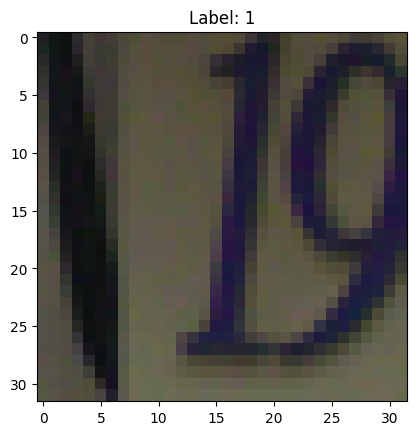

In [18]:
plt.imshow(X_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()